<a href="https://colab.research.google.com/github/moridin04/CCADMACL-Research/blob/main/PCA_Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Principal Component Analysis

# What is PCA?

Principal component analysis (PCA) is a fast and flexible unsupervised method for dimensionality reduction in data.

PCA can be used to simplify the data with high dimensions (larger than 2) into 2-dimensional data by eliminating the least influntial features on the data. However, we should know the elimination of data makes the independent variable less interpretable.

In [24]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from sklearn.decomposition import PCA

## Step 1: Load the dataset

In an unsupervised learning approach, the first step is to visualize the data so get a sense or feel of what we are working on.

We plot our data using scatterplots in either 2 dimensions or 3 dimensions to see any patterns or groupings that is currently in our data.

Unfortunately, this approach will not work because most real world datasets more than 3 dimensions.

As an example, let's use the famous iris dataset, which has the following 4 dimensions:
 * Sepal Length
 * Sepal Width
 * Pedal Length
 * Pedal Width

In [25]:
cfd = pd.read_csv('creditcard.csv')

X = cfd.drop('Class', axis=1)
y = cfd['Class']

feature_names = X.columns

This dataset is made of 4 features/dimensions: sepal length, sepal width, petal length, petal width.

In [26]:
X.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


## Step 2: Use PCA to for reduce the dimensions

Dimensions of iris data set before PCA

In [27]:
X.shape

(192217, 30)

We use PCA to project this 4 feature space into a 2-dimensional space.

In [28]:
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

X_scaled = StandardScaler().fit_transform(X_imputed)

pca = PCA(n_components=10)
X_principal = pca.fit_transform(X_scaled)

Dimensions of iris data set after PCA

In [29]:
X_principal.shape

(192217, 10)

## Step 3: Display the explained variances of each principal component using a Scree Plot

In [30]:
explained_variance = pca.explained_variance_ratio_

PC1_explainedvariance = explained_variance[0]
print("Explained variance of PC1", PC1_explainedvariance)

PC2_explainedvariance = explained_variance[1]
print("Explained variance of PC2", PC2_explainedvariance)

PC3_explainedvariance = explained_variance[2]
print("Explained variance of PC3", PC3_explainedvariance)

PC4_explainedvariance = explained_variance[3]
print("Explained variance of PC4", PC4_explainedvariance)

PC5_explainedvariance = explained_variance[4]
print("Explained variance of PC5", PC5_explainedvariance)

PC6_explainedvariance = explained_variance[5]
print("Explained variance of PC6", PC6_explainedvariance)

PC7_explainedvariance = explained_variance[6]
print("Explained variance of PC7", PC7_explainedvariance)

PC8_explainedvariance = explained_variance[7]
print("Explained variance of PC8", PC8_explainedvariance)

PC9_explainedvariance = explained_variance[8]
print("Explained variance of PC9", PC9_explainedvariance)

PC10_explainedvariance = explained_variance[9]
print("Explained variance of PC10", PC10_explainedvariance)

Explained variance of PC1 0.06676311792658765
Explained variance of PC2 0.04832849917608119
Explained variance of PC3 0.04629793017482832
Explained variance of PC4 0.04383768921888873
Explained variance of PC5 0.039992904465197605
Explained variance of PC6 0.03916250437521556
Explained variance of PC7 0.03665557332308034
Explained variance of PC8 0.035961382737838596
Explained variance of PC9 0.035383772941708955
Explained variance of PC10 0.03488431602412784


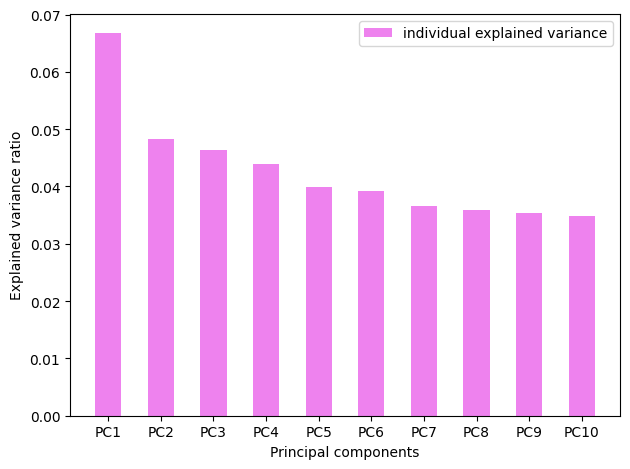

In [31]:
plt.figure()
principalcomponents = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10']

plt.bar(principalcomponents, explained_variance, width=0.5, label='individual explained variance', color='violet')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()

plt.show()

## Step 4: Plot the features after doing PCA

In [32]:
PC_df = pd.DataFrame({'PC1': X_principal[:, 0], 'PC2': X_principal[:, 1], 'PC3': X_principal[:, 2],
                      'PC4': X_principal[:, 3], 'PC5': X_principal[:, 4], 'PC6': X_principal[:, 5],
                      'PC7': X_principal[:, 6], 'PC8': X_principal[:, 7], 'PC9': X_principal[:, 8], 'PC10': X_principal[:, 9]})
PC_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,0.300624,-2.245041,0.026773,0.889365,0.535200,0.154145,-0.669728,-0.114568,-0.310529,0.250877
1,-0.505134,-1.951677,-0.119609,0.305484,-1.069498,-0.510001,-0.008534,0.066657,-0.221798,-0.082697
2,1.725567,-2.477156,-0.025427,0.803818,1.491025,-1.338785,1.194340,-0.432266,-0.634630,0.979187
3,0.204693,-1.464588,0.255649,0.404412,-0.805632,0.855628,-0.756003,0.046905,-0.226097,0.688023
4,-0.010103,-1.427531,0.031866,0.338692,0.828901,0.419862,-0.834649,0.781124,0.408881,-0.315650


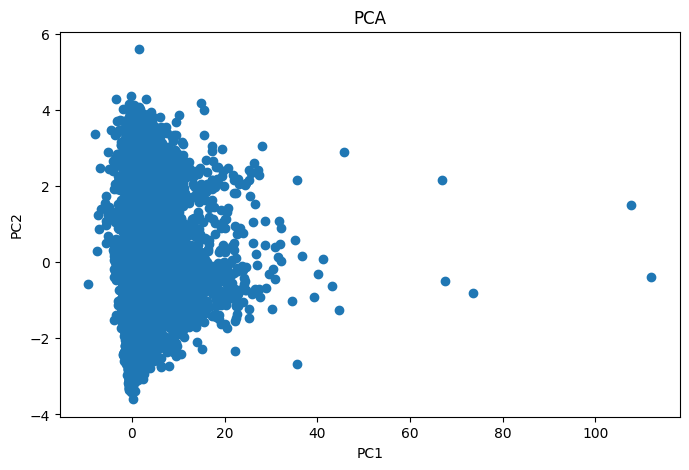

In [33]:
plt.figure(figsize=(8,5))
plt.scatter(PC_df['PC1'], PC_df['PC2'])
plt.title('PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

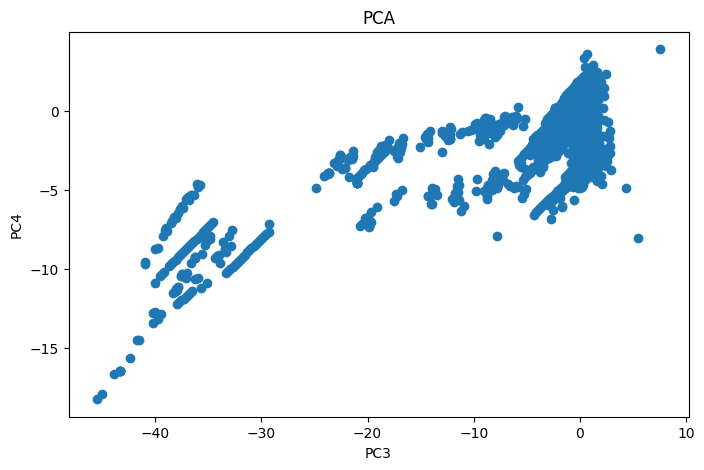

In [34]:
plt.figure(figsize=(8,5))
plt.scatter(PC_df['PC3'], PC_df['PC4'])
plt.title('PCA')
plt.xlabel('PC3')
plt.ylabel('PC4')
plt.show()

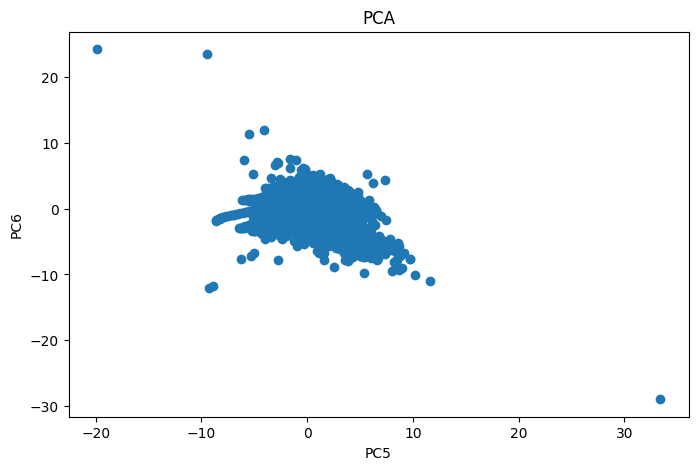

In [35]:
plt.figure(figsize=(8,5))
plt.scatter(PC_df['PC5'], PC_df['PC6'])
plt.title('PCA')
plt.xlabel('PC5')
plt.ylabel('PC6')
plt.show()

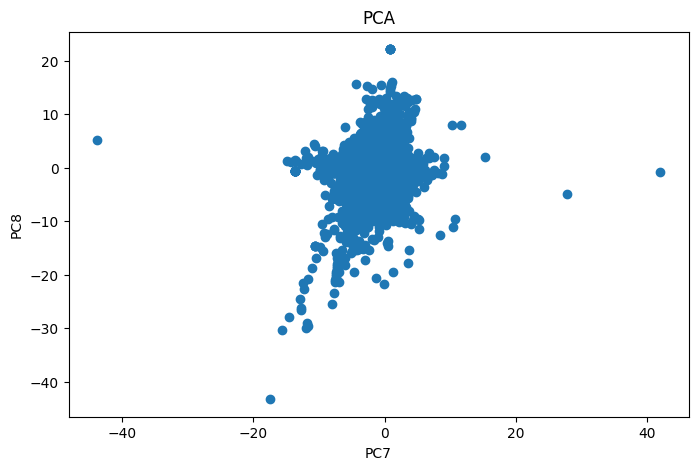

In [36]:
plt.figure(figsize=(8,5))
plt.scatter(PC_df['PC7'], PC_df['PC8'])
plt.title('PCA')
plt.xlabel('PC7')
plt.ylabel('PC8')
plt.show()

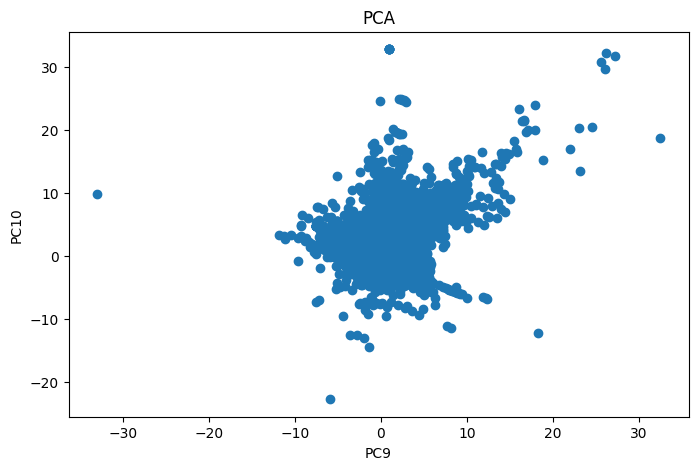

In [37]:
plt.figure(figsize=(8,5))
plt.scatter(PC_df['PC9'], PC_df['PC10'])
plt.title('PCA')
plt.xlabel('PC9')
plt.ylabel('PC10')
plt.show()

## Step 5: Get the loadings

Each feature will get a weight or loading that indicate the how much it contributes to a specific principal component (PC)

In [38]:
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

loading_matrix = pd.DataFrame(loadings, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10'], index=feature_names)
loading_matrix

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
Time,-0.002408,0.897106,0.007000,0.021697,0.102368,-0.002232,0.154490,0.021445,0.035773,-0.033105
V1,-0.239624,0.095485,0.264848,0.079511,-0.211807,0.301082,0.246940,0.211516,-0.332697,-0.331655
V2,-0.541113,-0.021139,-0.201597,-0.112877,-0.090875,-0.236609,-0.120025,0.099970,-0.216201,-0.196661
V3,-0.211188,-0.499625,0.409054,0.259002,0.348129,0.105075,-0.019493,0.214100,0.031517,-0.020992
V4,0.083094,-0.135138,-0.181510,-0.139432,0.123485,0.059853,0.018950,-0.071374,-0.082996,0.005847
V5,-0.383125,0.266705,0.299878,-0.042739,-0.062443,-0.033982,-0.083520,0.100258,0.068226,0.224194
V6,0.195012,0.049158,0.086666,-0.045307,-0.040436,0.310820,-0.439851,0.102444,-0.101720,-0.022332
V7,0.330577,0.076951,0.465488,0.129323,0.084011,-0.208182,0.090064,0.207542,-0.276620,-0.004657
V8,-0.070350,-0.052560,-0.097369,0.029712,-0.028982,0.125735,0.111091,0.004522,-0.015038,-0.326275
V9,-0.025229,-0.021238,0.235051,-0.409009,0.204602,0.240413,-0.119780,0.103495,0.039229,0.138663


## Step 6: Use a clustering algorithm

In [39]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300,
                  n_init = 10, random_state = 0)
kmeans.fit(PC_df)
labels = kmeans.labels_  # Cluster labels for each point
centroids = kmeans.cluster_centers_  # Cluster centroids

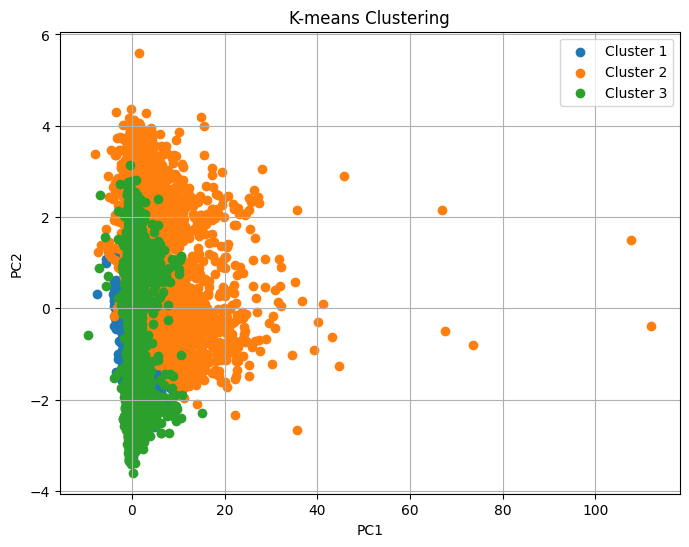

In [40]:
plt.figure(figsize=(8, 6))
for i in range(3):  # Assuming 3 clusters
    cluster_points = X_principal[labels == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1],
                label=f'Cluster {i + 1}')

# Plot centroids
# plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='red', marker='X', label='Centroids')

plt.title('K-means Clustering')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.grid(True)
plt.show()

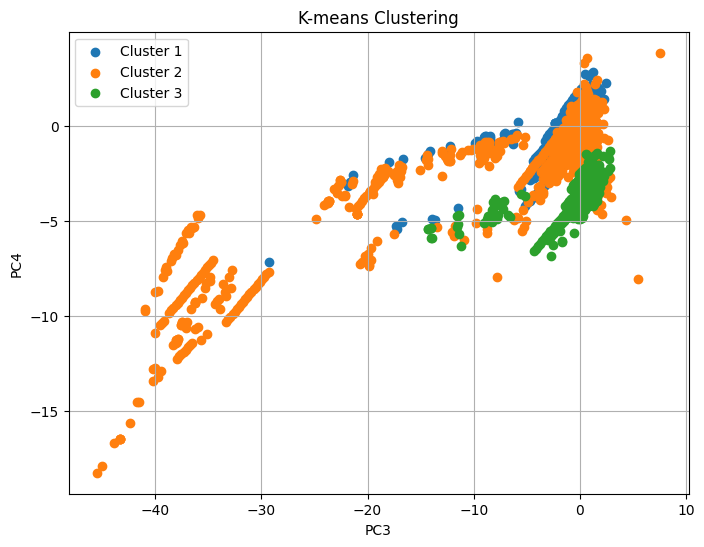

In [41]:
plt.figure(figsize=(8, 6))
for i in range(3):  # Assuming 3 clusters
    cluster_points = X_principal[labels == i]
    plt.scatter(cluster_points[:, 2], cluster_points[:, 3],
                label=f'Cluster {i + 1}')

# Plot centroids
# plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='red', marker='X', label='Centroids')

plt.title('K-means Clustering')
plt.xlabel('PC3')
plt.ylabel('PC4')
plt.legend()
plt.grid(True)
plt.show()

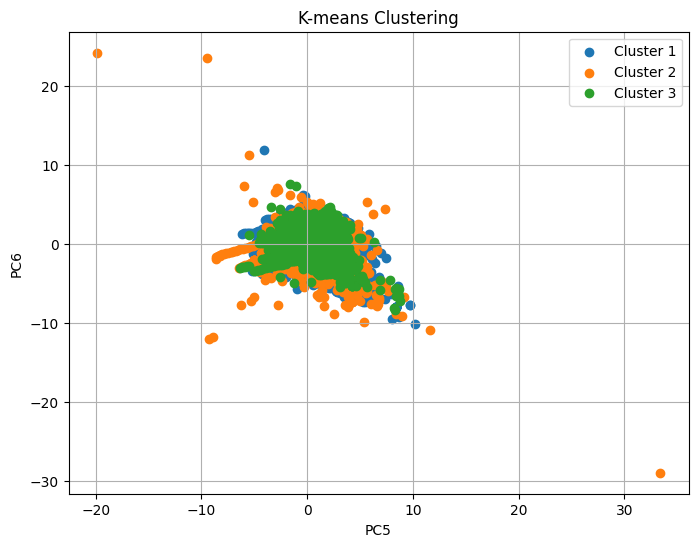

In [42]:
plt.figure(figsize=(8, 6))
for i in range(3):  # Assuming 3 clusters
    cluster_points = X_principal[labels == i]
    plt.scatter(cluster_points[:, 4], cluster_points[:, 5],
                label=f'Cluster {i + 1}')

# Plot centroids
# plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='red', marker='X', label='Centroids')

plt.title('K-means Clustering')
plt.xlabel('PC5')
plt.ylabel('PC6')
plt.legend()
plt.grid(True)
plt.show()

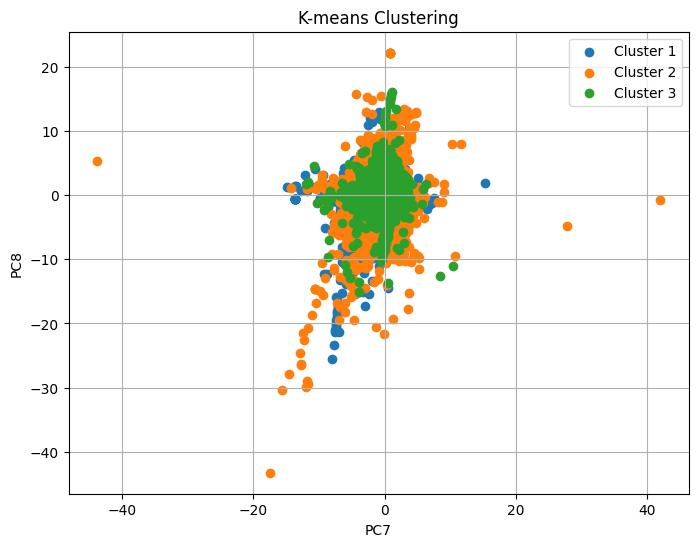

In [43]:
plt.figure(figsize=(8, 6))
for i in range(3):  # Assuming 3 clusters
    cluster_points = X_principal[labels == i]
    plt.scatter(cluster_points[:, 6], cluster_points[:, 7],
                label=f'Cluster {i + 1}')

# Plot centroids
# plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='red', marker='X', label='Centroids')

plt.title('K-means Clustering')
plt.xlabel('PC7')
plt.ylabel('PC8')
plt.legend()
plt.grid(True)
plt.show()

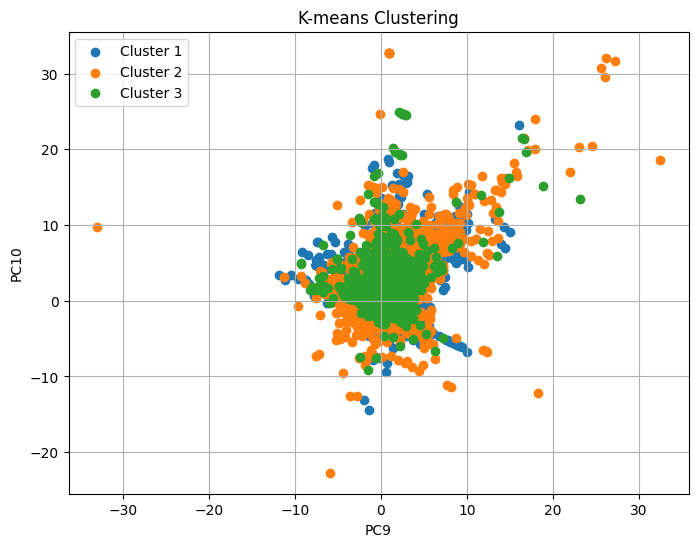

In [44]:
plt.figure(figsize=(8, 6))
for i in range(3):  # Assuming 3 clusters
    cluster_points = X_principal[labels == i]
    plt.scatter(cluster_points[:, 8], cluster_points[:, 9],
                label=f'Cluster {i + 1}')

# Plot centroids
# plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='red', marker='X', label='Centroids')

plt.title('K-means Clustering')
plt.xlabel('PC9')
plt.ylabel('PC10')
plt.legend()
plt.grid(True)
plt.show()